# Imports

In [1]:
import pandas as pd
import numpy as np
import zipfile
import glob
import os

In [2]:
# gfx
import seaborn as sns
import matplotlib.pyplot as plt

# maps
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline

# Import Data

In [257]:
# path to RKStudio exported data
file_path = "/Users/djw/Documents/pCloud_synced/Academics/Projects/2020_thesis/thesis_experiments/3_experiments/3_1_gap_measure/3_1_1_raw_data/testing"

In [258]:
# create empty dictionary
app_data = {}

# create list of zip files
data_files = glob.glob(f'{file_path}/*.zip')
data_files.sort(reverse=True)
# move the first entry to the end as it has slighlty different syntax
data_files = data_files[1:]+data_files[0:1]

# extract all csv files from zip
for zip_file in data_files:
    zf = zipfile.ZipFile(zip_file)

    # list of .csv files in zip
    file_names = zf.namelist()

    # loop through .csv files
    for file in file_names:
        try:
            df = pd.read_csv(zf.open(file), parse_dates=True)
            # clean up filename to use as key
            sep = '_'
            file = file.replace('.', '_')
            file = file.split(sep,1)[0]

        except pd.errors.EmptyDataError:
            print(f'Note: {file} was empty. Skipping.')
            continue # will skip the rest of the block and move to next file
        
        try:
            app_data[file] = app_data[file].append(df, ignore_index=True)
        except KeyError:
            app_data[file] = df

In [6]:
app_data.keys()

dict_keys(['SurveyResults', 'SurveyStepResults', 'SurveyQuestionResults', 'SurveyConsentSignatureResults', 'StudyParticipants', 'Manifest'])

# Data Clean

## Note

Feature columns should be correct as of **March 9, 2021**

---

**DateTime** is in [ISO 8601 format](https://en.wikipedia.org/wiki/ISO_8601)
- e.g. `2021-03-05T13:53:52+00:00`
- the +/- offset refers to `UTC`
- but the time is CORRECT for local time
- looks like it was originally created using:

```
# UTC to ISO 8601 with Local TimeZone information without microsecond (Python 3):

import datetime
datetime.datetime.now().astimezone().replace(microsecond=0).isoformat()
>>> 2020-03-20T14:31:43+13:00
```
---

**File Names** are:

In [5]:
list(app_data.keys())

['AuxiliaryData',
 'AppleLocationVisits',
 'HealthKitCharacteristics',
 'Notifications',
 'StudyParticipants',
 'SurveyResults',
 'SurveyStepResults',
 'SurveyQuestionResults',
 'SurveyConsentSignatureResults',
 'SurveyStroopResults',
 'SurveyTrailmakingResults',
 'SurveyTasks',
 'HealthKitSamples',
 'Manifest']

## Add Date
Add a year/month day for each row

In [86]:
# NOT YET IMPLEMENTED

# Add date
df['Date'] = pd.to_datetime(df.StartDate, format= '%Y-%m-%d').dt.date

# Alt (not tested)
df.assign(Date=lambda x: pd.to_datetime(x.StartDate, format= '%Y-%m-%d').dt.date)

<ipython-input-86-d46327fc2ed5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df.StartDate, format= '%Y-%m-%d').dt.date


# Explore Data

## Participants

In [259]:
# Unique participants
app_data['StudyParticipants'].drop_duplicates(subset='ParticipantIdentifier')

,ParticipantIdentifier,GlobalKey,EmailAddress,FirstName,LastName,Gender,DateOfBirth,SecondaryIdentifier,PostalCode,EnrollmentDate,EventDates,CustomFields
0,a81e5b0b-8277-499d-ad31-5f2b266e077b,0047d3d6-0474-eb11-aaa6-0afb9334277d,jacob.koudys@mail.utoronto.ca,Jacob,Koudys,NaN,NaN,NaN,NaN,2021-02-21T05:25:28Z,{},"{""ideal_3"":""Caring "",""ideal_4"":""Consistent"",""o..."
1,0eb208dd-de30-42e9-a7a1-a64923a8068c,0edbf7ab-0c81-eb11-aaa6-0afb9334277d,yoelinbar@gmail.com,Yoel,Inbar,NaN,NaN,NaN,NaN,2021-03-09T19:23:00Z,{},{}
2,e668ab43-b5a6-4466-a71a-9a8bd1109a0f,3b626652-4e75-eb11-aaa6-0afb9334277d,azadeh.haji@utoronto.ca,Azadeh,HajiHosseini,NaN,NaN,NaN,NaN,2021-03-07T23:23:16Z,{},"{""ideal_4"":""composed"",""ideal_1"":""Confident"",""o..."
3,20830401-bf21-47da-a36c-1090c5fe09c7,3fb63633-3575-eb11-aaa6-0afb9334277d,mostafa.miandari@gmail.com,Mostafa,Miandari,NaN,NaN,NaN,NaN,2021-02-22T18:05:06Z,{},{}
4,4c13fc48-f5c6-4f43-9794-e17b6c22608a,5cb14535-9773-eb11-aaa6-0afb9334277d,yang.teoh@mail.utoronto.ca,Yang,Teoh,NaN,NaN,NaN,NaN,2021-02-25T19:01:46Z,{},"{""ought_3"":""compassionate"",""ideal_2"":""conscien..."
5,fcc53a2c-1e99-4ee2-9981-533607134644,7ffa0809-6b65-eb11-aaa4-0afb9334277d,medialpfc@gmail.com,Cendri,Hutcherson,NaN,NaN,NaN,NaN,2021-02-19T04:41:52Z,{},"{""ideal_2"":""Caring"",""ideal_1"":""Efficient"",""oug..."
6,63080c8b-e17b-40f5-a55c-2e3a1da0a34a,3bc85552-9a85-eb11-aaa6-0afb9334277d,andyjh.kim@mail.utoronto.ca,Andy,Kim,NaN,NaN,NaN,NaN,2021-03-15T15:21:22Z,{},"{""ideal_2"":""Adventurous"",""ideal_3"":""diligent"",..."
7,48700346-4b87-4354-b02d-65182b3a89ab,851607b3-6775-eb11-aaa6-0afb9334277d,hauselin@gmail.com,Hause,Lin,NaN,NaN,NaN,NaN,2021-02-22T23:44:54Z,{},"{""ideal_5"":""ambitious"",""ideal_2"":""Conscientiou..."
8,9149b9bc-a081-4aa2-8362-ea09a733a0b5,598d6735-9465-eb11-aaa4-0afb9334277d,dw@danieljwilson.com,Daniel,Wilson,NaN,NaN,NaN,NaN,2021-02-19T15:38:05Z,{},"{""ideal_4"":""brilliant"",""ideal_2"":""Creative"",""o..."
9,29c9f028-14cc-4973-b236-b58811d13fae,474b59b8-3580-eb11-aaa6-0afb9334277d,vic.oldemburgo@gmail.com,Victoria,Oldemburgo,NaN,NaN,NaN,NaN,2021-03-08T17:46:57Z,{},"{""ought_2"":""a \""good wife\"" - who cooks well, ..."


# Surveys
- SurveyQuestionResults_20210127-20210128.csv
- SurveyResults_20210127-20210128.csv
- SurveyStepResults_20210127-20210128.csv
- SurveyTasks_20210127-20210128.csv

In [15]:
app_data.keys()

dict_keys(['SurveyResults', 'SurveyStepResults', 'SurveyQuestionResults', 'SurveyConsentSignatureResults', 'StudyParticipants', 'Manifest'])

In [271]:
# categories include:
np.unique(app_data['SurveyQuestionResults'].ResultIdentifier)

array(['CONSENT_FLUENT_ENGLISH', 'CONSENT_IS_OVER_18',
       'CONSENT_LIVES_IN_CANADA', 'CONSENT_STUDENT',
       'IB_GAP_action_gap_day_actual', 'IB_GAP_action_gap_day_belief',
       'IB_GAP_action_gap_month_actual', 'IB_GAP_action_gap_month_belief',
       'IB_GAP_action_gap_style_goals_1',
       'IB_GAP_action_gap_style_goals_2',
       'IB_GAP_action_gap_style_goals_3',
       'IB_GAP_action_gap_style_goals_4',
       'IB_GAP_action_gap_style_planning_1',
       'IB_GAP_action_gap_style_planning_2',
       'IB_GAP_action_gap_week_actual', 'IB_GAP_action_gap_week_belief',
       'IB_GAP_action_gap_year_actual', 'IB_GAP_action_gap_year_belief',
       'IB_GAP_expectation_other', 'IB_GAP_expectation_own',
       'IB_GAP_feedback_1', 'IB_GAP_feedback_2', 'IB_GAP_ideal_1',
       'IB_GAP_ideal_1_actual', 'IB_GAP_ideal_1_potential',
       'IB_GAP_ideal_2', 'IB_GAP_ideal_2_actual',
       'IB_GAP_ideal_2_potential', 'IB_GAP_ideal_3',
       'IB_GAP_ideal_3_actual', 'IB_GAP_ideal_3_pot

In [272]:
app_data['SurveyQuestionResults'].head(2)

,SurveyQuestionResultKey,SurveyStepResultKey,SurveyResultKey,ParticipantIdentifier,ResultIdentifier,Answers,StartDate,EndDate
0,c97cce16-a285-eb11-aaa6-0afb9334277d,bb7cce16-a285-eb11-aaa6-0afb9334277d,b27cce16-a285-eb11-aaa6-0afb9334277d,63080c8b-e17b-40f5-a55c-2e3a1da0a34a,CONSENT_IS_OVER_18,True,2021-03-15T11:18:45-04:00,2021-03-15T11:20:06-04:00
1,ca7cce16-a285-eb11-aaa6-0afb9334277d,bb7cce16-a285-eb11-aaa6-0afb9334277d,b27cce16-a285-eb11-aaa6-0afb9334277d,63080c8b-e17b-40f5-a55c-2e3a1da0a34a,CONSENT_LIVES_IN_CANADA,four_plus,2021-03-15T11:18:45-04:00,2021-03-15T11:20:06-04:00


In [275]:
# select daily columns
IB_col = [col for col in app_survey if col.startswith('IB_GAP')]

In [276]:
app_survey = app_survey[['ParticipantIdentifier', 'Date'] + IB_col]
app_survey.head(2)

ResultIdentifier,ParticipantIdentifier,Date,IB_GAP_action_gap_day_actual,IB_GAP_action_gap_day_belief,IB_GAP_action_gap_month_actual,IB_GAP_action_gap_month_belief,IB_GAP_action_gap_style_goals_1,IB_GAP_action_gap_style_goals_2,IB_GAP_action_gap_style_goals_3,IB_GAP_action_gap_style_goals_4,...,IB_GAP_values_ought_5_list,IB_GAP_values_ought_5_potential,IB_GAP_values_overall_conflict,IB_GAP_values_overall_ideal,IB_GAP_values_overall_ought,IB_GAP_values_overall_overlap,IB_GAP_warm_up_animal,IB_GAP_warm_up_color,IB_GAP_warm_up_color_sure,IB_GAP_warm_up_food
0,0eb208dd-de30-42e9-a7a1-a64923a8068c,2021-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20830401-bf21-47da-a36c-1090c5fe09c7,2021-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


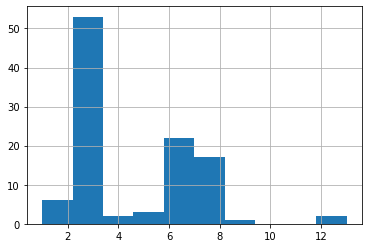

In [277]:
# how many values in each column
app_survey.count().hist()

## Action Gap

In [278]:
# select only action columns
action_cols = app_survey.columns[app_survey.columns.str.contains('action_gap')]
# action_df = app_survey[['ParticipantIdentifier', 'Date'] + list(action_cols)]

# Cast strings to ints and nans
action_df = action_df[action_cols].replace('NaN', np.nan).astype(float)
action_df.columns.name = None
action_df.head(3)

,IB_GAP_action_gap_day_actual,IB_GAP_action_gap_day_belief,IB_GAP_action_gap_month_actual,IB_GAP_action_gap_month_belief,IB_GAP_action_gap_style_goals_1,IB_GAP_action_gap_style_goals_2,IB_GAP_action_gap_style_goals_3,IB_GAP_action_gap_style_goals_4,IB_GAP_action_gap_style_planning_1,IB_GAP_action_gap_style_planning_2,IB_GAP_action_gap_week_actual,IB_GAP_action_gap_week_belief,IB_GAP_action_gap_year_actual,IB_GAP_action_gap_year_belief
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60.0,80.0,90.0,90.0,6.0,2.0,3.0,1.0,6.0,5.0,80.0,100.0,50.0,100.0


In [279]:
action_time = action_df[['IB_GAP_action_gap_day_actual', 'IB_GAP_action_gap_day_belief',
               'IB_GAP_action_gap_week_actual', 'IB_GAP_action_gap_week_belief',
               'IB_GAP_action_gap_month_actual', 'IB_GAP_action_gap_month_belief',
               'IB_GAP_action_gap_year_actual', 'IB_GAP_action_gap_year_belief']]

action_style = action_df[['IB_GAP_action_gap_style_goals_1', 'IB_GAP_action_gap_style_goals_2',
                'IB_GAP_action_gap_style_goals_3', 'IB_GAP_action_gap_style_goals_4',
                'IB_GAP_action_gap_style_planning_1', 'IB_GAP_action_gap_style_planning_2']]

In [280]:
# rename columns for legibility
action_style = action_style.rename(columns={"IB_GAP_action_gap_style_goals_1": 'ambitious goals',
                             "IB_GAP_action_gap_style_goals_2": 'extreme goals',
                             'IB_GAP_action_gap_style_goals_3': 'changing goals',
                             'IB_GAP_action_gap_style_goals_4': 'plan for contingencies',
                             'IB_GAP_action_gap_style_planning_1': 'detailed planning',
                             'IB_GAP_action_gap_style_planning_2': 'same schedule'
                            })

In [281]:
action_time = 100 - action_time.dropna()

### Timeframe

#### Plot

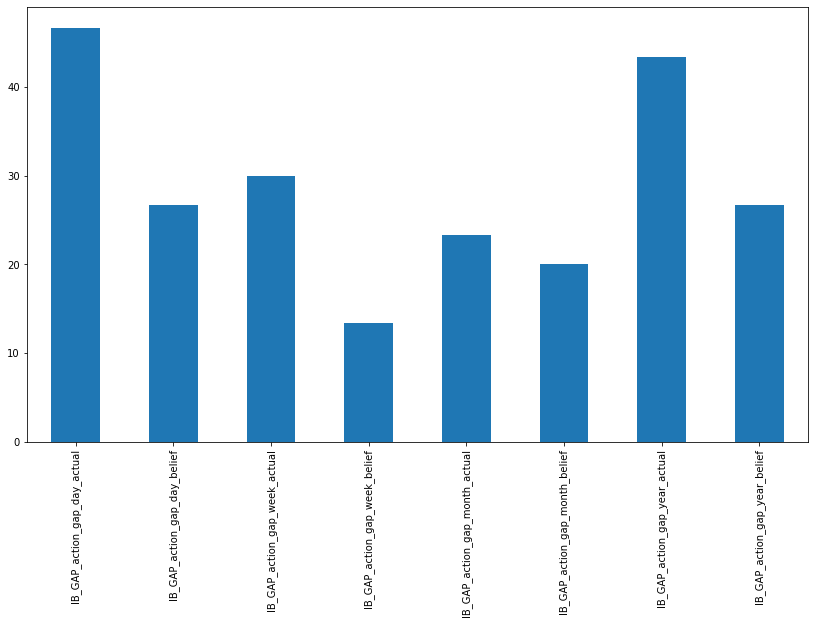

In [269]:
plt.figure(figsize=(14, 8))

action_time.mean().plot.bar()

#### Values

In [114]:
action_actual_gap = action_time[list(action_time.columns[action_time.columns.str.contains('actual')])].mean().mean()
action_belief_gap = action_time[list(action_time.columns[action_time.columns.str.contains('belief')])].mean().mean()
dif = action_actual_gap - action_belief_gap

print('Actual gap: {:0.2f}%\nBelief gap: {:0.2f}%\n\nActual-Belief gap: {:0.2f}%\n'.format(action_actual_gap, action_belief_gap, dif))

Actual gap: 35.83%
Belief gap: 21.67%

Actual-Belief gap: 14.17%



#### Correlation

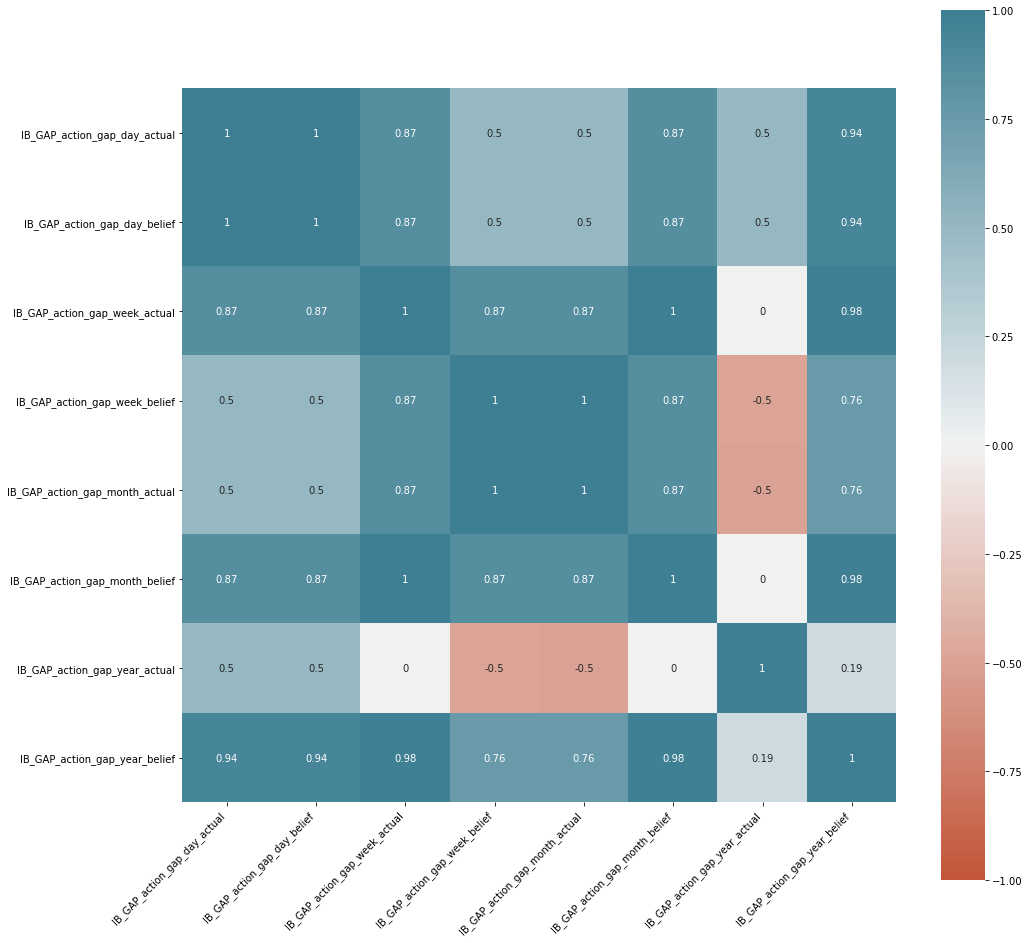

In [119]:
# correlation plot just for fun
plt.figure(figsize=(16, 16))

data = action_time

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

### Style

[Link](https://docs.google.com/document/d/1v6dURzXTiGP5oiFSYRnPkTnYLjwdFbEZkTJyL-VZF6Y/edit#heading=h.id58br2r09hk")

#### Plot

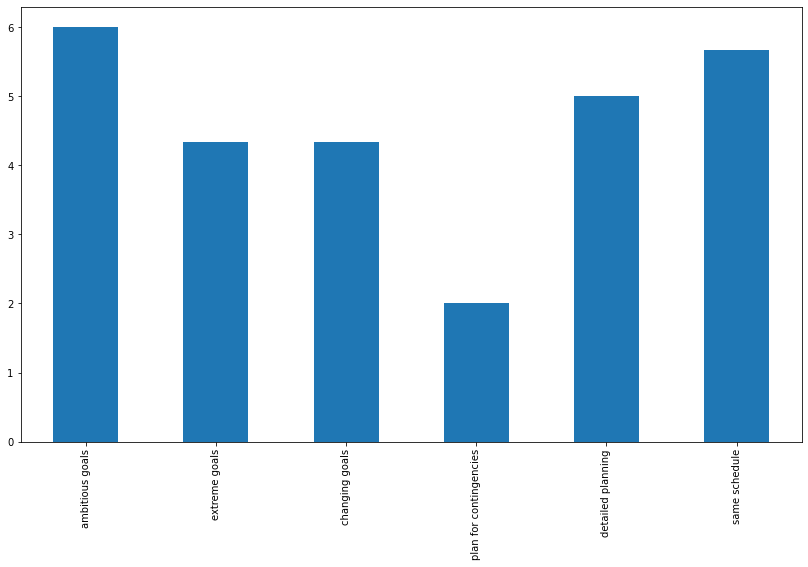

In [127]:
plt.figure(figsize=(14, 8))

action_style.mean().plot.bar()

#### Values

In [128]:
action_style.mean()

ambitious goals           6.000000
extreme goals             4.333333
changing goals            4.333333
plan for contingencies    2.000000
detailed planning         5.000000
same schedule             5.666667
dtype: float64

#### Correlation

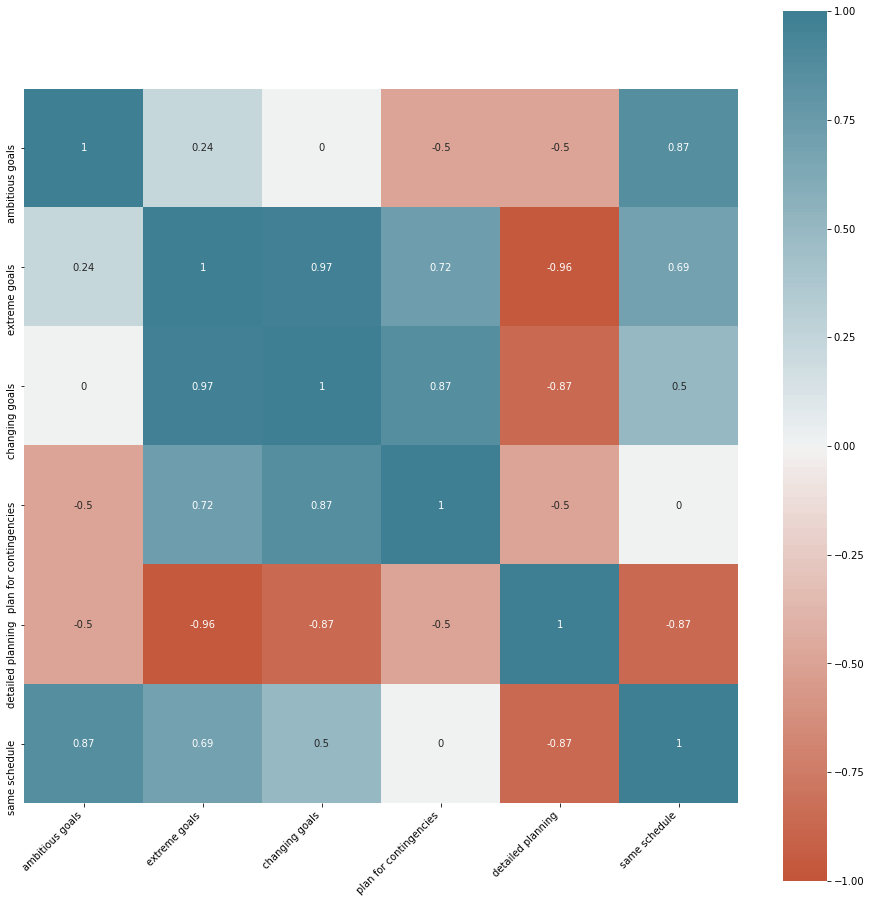

In [129]:
# correlation plot just for fun
plt.figure(figsize=(16, 16))

data = action_style

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Value Gap

In [176]:
# select only action columns
cols_potential = app_survey.columns[app_survey.columns.str.contains('potential')]
cols_actual = app_survey.columns[app_survey.columns.str.contains('actual')]
cols_overall =  app_survey.columns[app_survey.columns.str.contains('overall')][2:]

values = app_survey[list(cols_potential) + list(cols_actual)]
val_cols = values.columns[values.columns.str.contains('values')]
values = values[list(val_cols)]

values_overall = app_survey[list(cols_overall)]

# get rid of index name
values.columns.name = None
values_overall.columns.name = None

In [177]:
values = values.dropna().reset_index(drop=True)
values_overall = values_overall.dropna().reset_index(drop=True)

In [185]:
values = values.astype('int')

In [186]:
values_gap = 100-values

In [204]:
actual_ideal = values_gap.loc[:, (values_gap.columns.str.contains('actual')) & (values_gap.columns.str.contains('ideal'))].to_numpy().flatten()
actual_ought = values_gap.loc[:, (values_gap.columns.str.contains('actual')) & (values_gap.columns.str.contains('ought'))].to_numpy().flatten()
potential_ideal = values_gap.loc[:, (values_gap.columns.str.contains('potential')) & (values_gap.columns.str.contains('ideal'))].to_numpy().flatten()
potential_ought = values_gap.loc[:, (values_gap.columns.str.contains('potential')) & (values_gap.columns.str.contains('ought'))].to_numpy().flatten()

value_summary = pd.DataFrame({'actual: ideal': actual_ideal,
                              'actual: ought': actual_ought,
                              'potential: ideal': potential_ideal,
                              'potential: ought': potential_ought
                             })

### Ideal

#### Plot

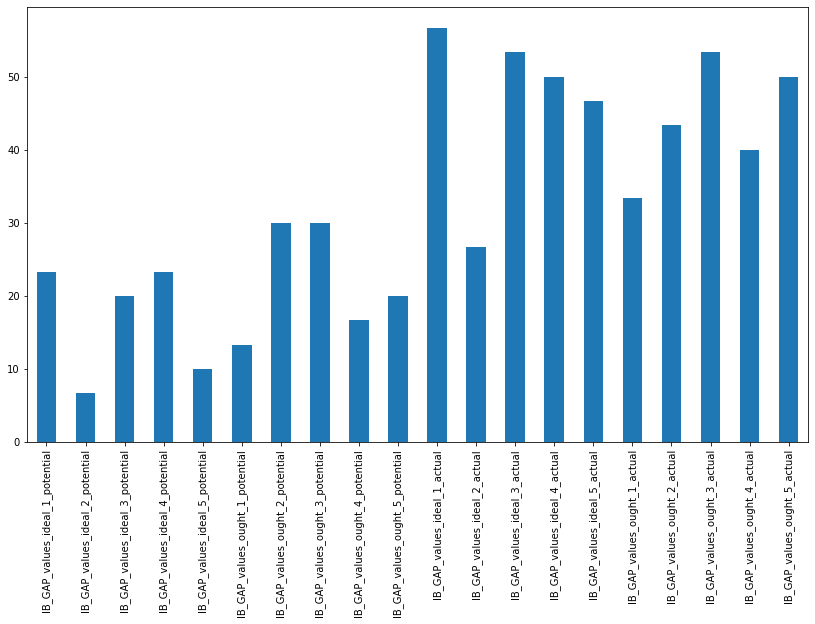

In [205]:
plt.figure(figsize=(14, 8))

values_gap.mean().plot.bar()

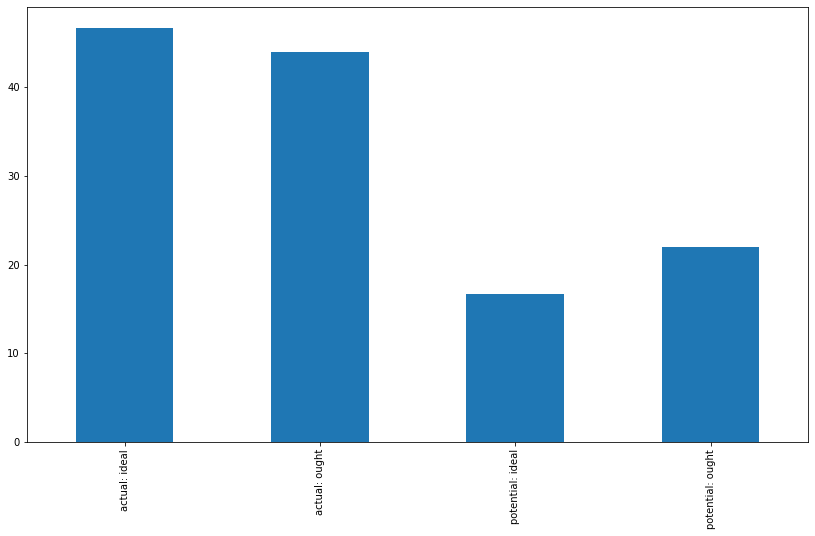

In [206]:
plt.figure(figsize=(14, 8))

value_summary.mean().plot.bar()

#### Values

In [207]:
value_summary.mean()

actual: ideal       46.666667
actual: ought       44.000000
potential: ideal    16.666667
potential: ought    22.000000
dtype: float64

In [208]:
value_summary.mean().mean()

32.33333333333333

In [213]:
# actual - potential
value_summary.mean()[0:2].mean() - value_summary.mean()[2:4].mean()

25.999999999999993

#### Correlation

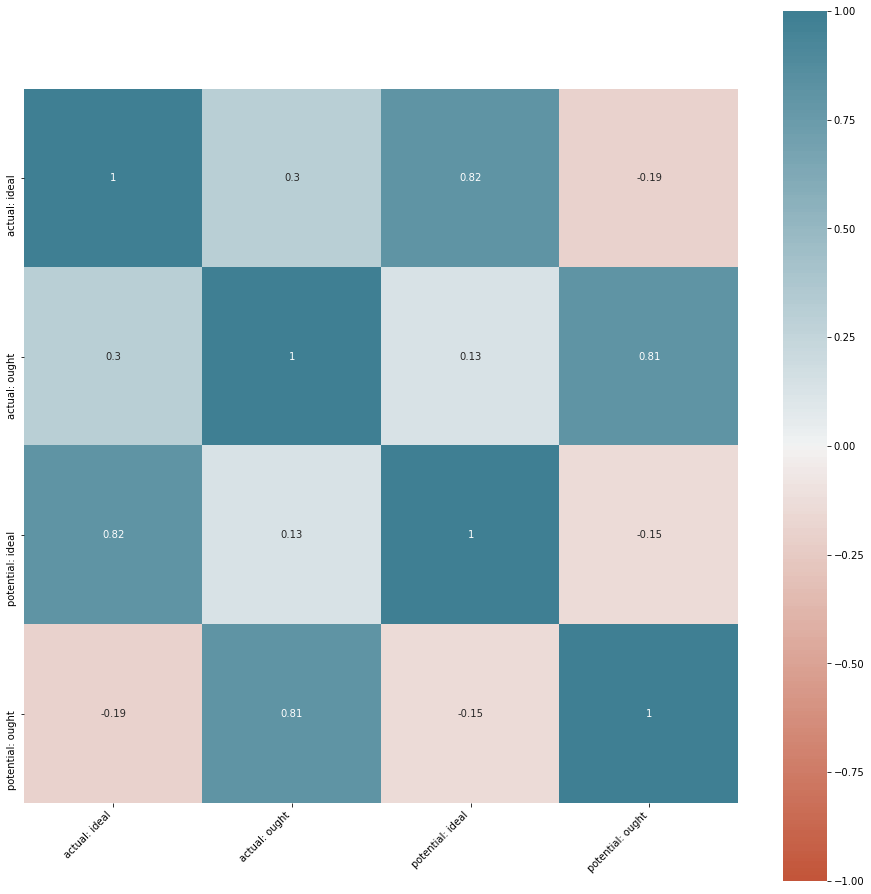

In [209]:
# correlation plot just for fun
plt.figure(figsize=(16, 16))

data = value_summary

corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Meta Gap

In [238]:
cols = list(app_survey.columns[app_survey.columns.str.contains('meta')]) + ['IB_GAP_expectation_other']

In [240]:
app_survey[cols].dropna()

ResultIdentifier,IB_GAP_meta_cause,IB_GAP_meta_expectation_own,IB_GAP_meta_overall_feeling,IB_GAP_meta_potential,IB_GAP_expectation_other
2,3,60,2,60,50
6,5,70,4,60,80
12,6,60,4,40,80


## Gap Comparsion

In [253]:
action_actual = action_time.loc[:, action_time.columns.str.contains('actual')].to_numpy().flatten()
action_belief = action_time.loc[:, action_time.columns.str.contains('belief')].to_numpy().flatten()

values_actual = values_gap.loc[:, values_gap.columns.str.contains('actual')].to_numpy().flatten()
values_potential = values_gap.loc[:, values_gap.columns.str.contains('potential')].to_numpy().flatten()

meta = app_survey['IB_GAP_meta_potential'].dropna().astype('int')
meta_gap = 100-meta

In [255]:
d = {'action: actual': action_actual,
                   'action: belief': action_belief,
                   'values: actual': values_actual,
                   'values: potential': values_potential,
                   'meta gap': meta_gap
                  }

df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d.items() ]))

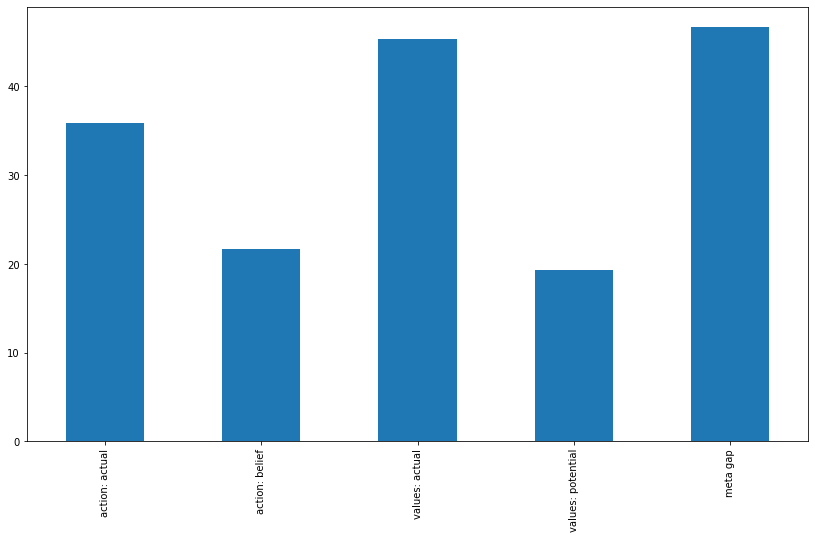

In [256]:
plt.figure(figsize=(14, 8))

df.mean().plot.bar()